In [1]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json
import csv

### Part 1: Visualization: Shot Charts and Effiency Based on Heat Map(Shots Made) and (Shots Missed)
In this part, we are 

In [2]:
# Load the json file into a  pandas dataframe.

# Traditional method from assignments did not work, did what this link has
# instead.

# https://stackoverflow.com/questions/42705228/how-to-read-these-json-files

with open('shotchartdetail2014-2015.json') as data_file:
   shot_attempts = data_file.read()    
   try:
       shot_data = json.loads(shot_attempts)
   except ValueError:
       print('Failed:')  
        
##with open('shotchartdetail2015-2016.json') as data_file:
   ##shot_attempts = data_file.read()    
   ##try:
      ## shot_data2 = json.loads(shot_attempts)
##   except ValueError
##       print('Failed:')      

In [3]:
# Get the headers so we can use them as column headers for the Data Frame
headers = shot_data['resultSets'][0]['headers']

# Get shot chart data
shots = shot_data['resultSets'][0]['rowSet']

#print(headers)
#print(shots)

In [4]:
# Add 'shots' to our DataFrame
df_shots = pd.DataFrame(shots, columns=headers)

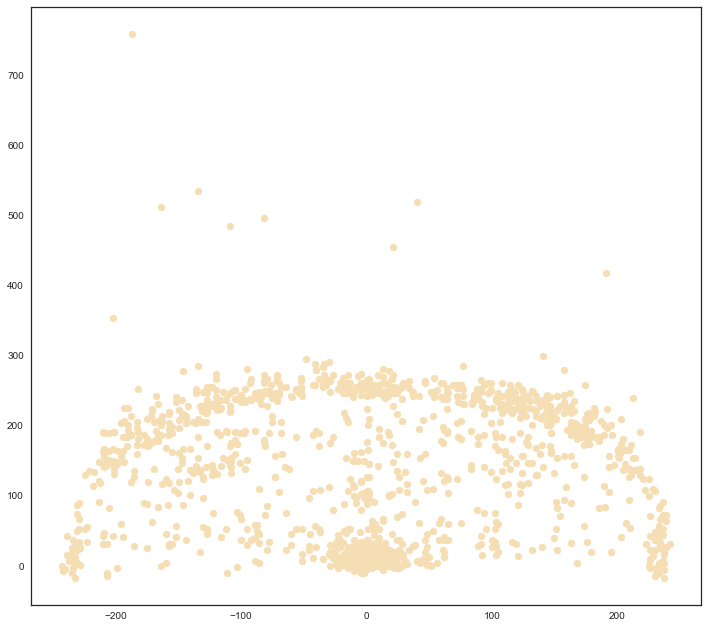

In [5]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(df_shots.LOC_X, df_shots.LOC_Y, color='wheat')
plt.show()

### Making Court



In [6]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='white', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
        ax.set_facecolor('darkblue')

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    #inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,  color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)
    
    # Wings
    wing_one = Rectangle((249, 142.5), -170, 280, linewidth=lw, color='red', fill=False, linestyle='dashed')
    wing_two = Rectangle((-248, 142.5), 170, 280, linewidth=lw, color='red', fill=False, linestyle='dashed')

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, top_free_throw, bottom_free_throw,corner_three_a,
                      restricted,corner_three_b, three_arc, outer_box, wing_one, wing_two]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

### Court with all shots

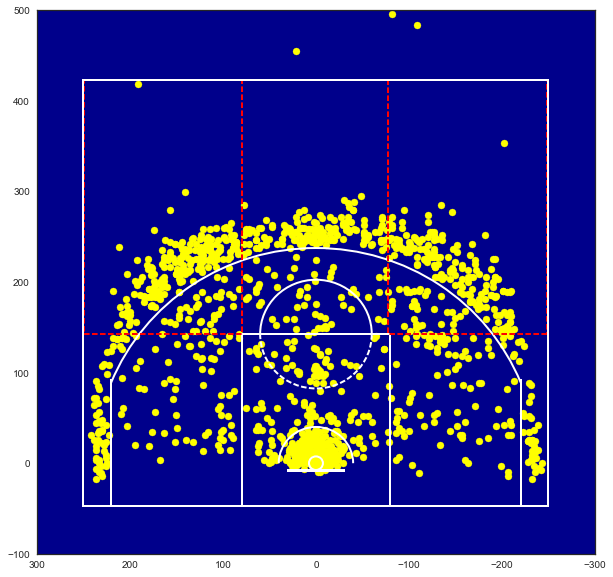

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(df_shots.LOC_X, df_shots.LOC_Y, color='yellow')
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.ylim(-100, 500)
plt.show()

### Find Field Goal Percentage of all 3 pointers

In [8]:
df_shots.drop(['GRID_TYPE','GAME_ID','GAME_EVENT_ID','PLAYER_ID','PLAYER_NAME','TEAM_ID','TEAM_NAME','PERIOD','MINUTES_REMAINING','SECONDS_REMAINING','HTM','VTM','ACTION_TYPE'], axis=1, inplace=True)

In [9]:
def create_charts(shot_chart):
    with open(shot_chart) as data_file:
        shot_attempts = data_file.read()    
        
        try:
            shot_data = json.loads(shot_attempts)
        except ValueError:
            print('Failed:')  
    
    headers = shot_data['resultSets'][0]['headers']

    # Get shot chart data
    shots = shot_data['resultSets'][0]['rowSet']
    df_shots = pd.DataFrame(shots, columns=headers)
    
    # Get three point FG's only
    threept = df_shots[df_shots['SHOT_TYPE'] == '3PT Field Goal']
    made_shots = threept[threept['EVENT_TYPE'] == 'Made Shot']
    
    
    # Create the graph title
    file_name = shot_chart.split(".json")
    name = ''.join(file_name)
    title_name = name[15:24] + ' Season 3pt Hot Spots'    
    
    plt.figure(figsize=(12,11))
    plt.scatter(made_shots.LOC_X, made_shots.LOC_Y, color='#add8e6')
    draw_court(outer_lines=True)

    plt.xlim(300,-300)
    plt.ylim(-70,500)
    
    #making heatmap
    plt.hist2d(made_shots.LOC_X, made_shots.LOC_Y, (8, 12), cmap=plt.cm.jet)
    plt.colorbar()
    
    plt.title(title_name, fontsize=25)

    plt.show() 

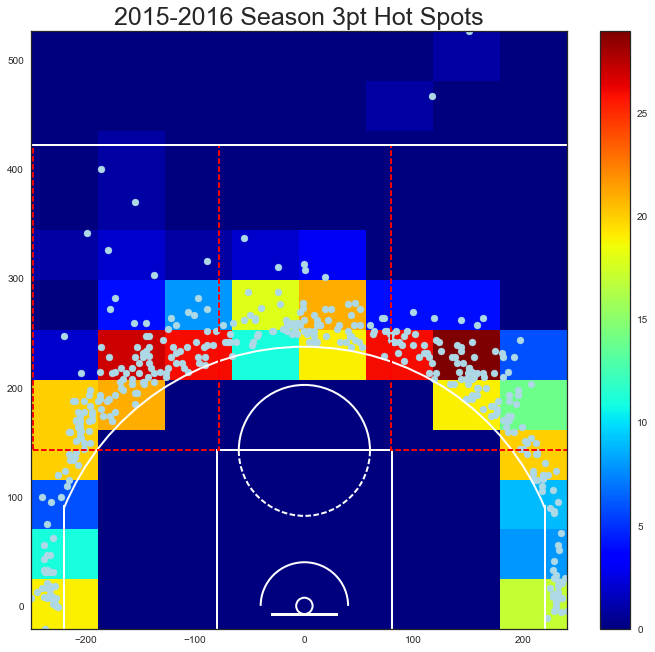

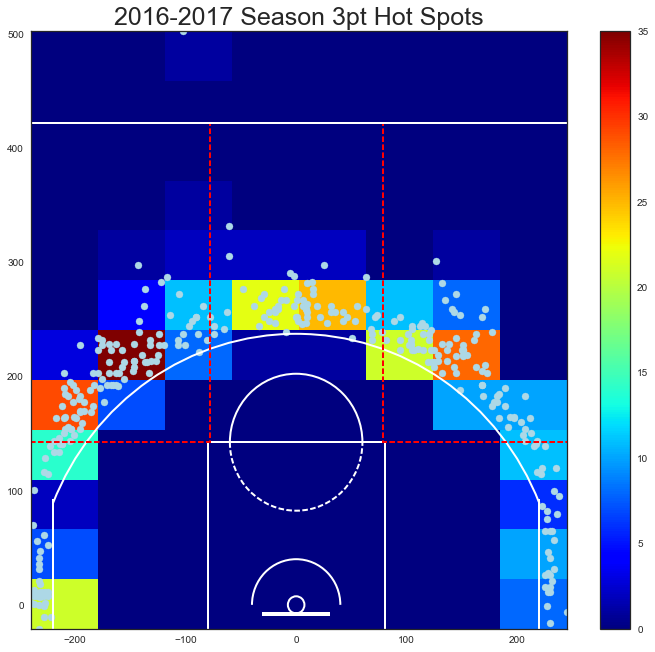

In [10]:
create_charts('shotchartdetail2015-2016.json')
create_charts('shotchartdetail2016-2017.json')

In [11]:
def get_fg_pct(shot_chart):
    with open(shot_chart) as data_file:
        shot_attempts = data_file.read()    
        
    try:
        shot_data = json.loads(shot_attempts)
    except ValueError:
        print('Failed:')
            
    headers = shot_data['resultSets'][0]['headers']

    # Get shot chart data
    shots = shot_data['resultSets'][0]['rowSet']
    df_shots = pd.DataFrame(shots, columns=headers)        
    
    threept = df_shots[df_shots['SHOT_TYPE'] == '3PT Field Goal']
    
    #find the total number for 3pts attempted
    shots_attempted = threept[threept['SHOT_ATTEMPTED_FLAG']]
    totalshots = shots_attempted.count().max()
    
    #drop the missed shots from total 3 pts attempted
    made_shots = threept[threept['EVENT_TYPE'] == 'Made Shot']
    
    #find total number of made shots
    made_attempted = made_shots[made_shots['SHOT_ATTEMPTED_FLAG']]
    totalmade = made_attempted.count().max()
    
    fgpercentage = totalmade / totalshots
    return fgpercentage * 100
    #return '{percent:.2%}'.format(percent=fgpercentage)

In [12]:
print(get_fg_pct('shotchartdetail2015-2016.json'))

45.3724604966


In [13]:
def get_center_pct(shot_chart):
    with open(shot_chart) as data_file:
        shot_attempts = data_file.read()    
        
    try:
        shot_data = json.loads(shot_attempts)
    except ValueError:
        print('Failed:')
            
    headers = shot_data['resultSets'][0]['headers']

    # Get shot chart data
    shots = shot_data['resultSets'][0]['rowSet']
    df_shots = pd.DataFrame(shots, columns=headers)        
    
    threept = df_shots[df_shots['SHOT_TYPE'] == '3PT Field Goal']
    
    #isolate center zone of the court
    centercolumn = threept[threept['LOC_X'] <= 79]
    center = centercolumn[centercolumn['LOC_X'] >= -79]
    
    #CENTER
    #find the total 3pt shots attempted from the center of
    #the 3pt line.
    centeratt = center[center['SHOT_ATTEMPTED_FLAG']]
    centershots = centeratt.count().max()
    
    #drop the miss shots from the total 3 pts attempted
    centermade = center[center['EVENT_TYPE'] == 'Made Shot']
    
    #find the total number of made shots from the center.
    centerattempted = centermade[centermade['SHOT_ATTEMPTED_FLAG']]
    centermade = centerattempted.count().max()
    
    #find the fg percentage from the center.
    centerpercentage = centermade / centershots
    return centerpercentage * 100
    #return '{percent:.2%}'.format(percent=centerpercentage)

In [14]:
print(get_center_pct('shotchartdetail2015-2016.json'))

43.9024390244


In [15]:
def get_leftwing_pct(shot_chart):
    with open(shot_chart) as data_file:
        shot_attempts = data_file.read()    
        
    try:
        shot_data = json.loads(shot_attempts)
    except ValueError:
        print('Failed:')

    headers = shot_data['resultSets'][0]['headers']

    # Get shot chart data
    shots = shot_data['resultSets'][0]['rowSet']
    df_shots = pd.DataFrame(shots, columns=headers)        
    
    threept = df_shots[df_shots['SHOT_TYPE'] == '3PT Field Goal']
    
    #isolate each zones of the court
    leftcolumn = threept[threept['LOC_X'] >= 79]
    leftwing = leftcolumn[leftcolumn['LOC_Y'] >= 142.5]
    
    #LEFT WING
    #find the total 3pt shots attempted at the right wing
    ltwingatt = leftwing[leftwing['SHOT_ATTEMPTED_FLAG']]
    ltwingshots = ltwingatt.count().max()
    
    #drop the miss shots from the total 3 pts attempted
    ltwingmade = leftwing[leftwing['EVENT_TYPE'] == 'Made Shot']
    
    #find the total number of made shots from the right wing
    ltwingattempted = ltwingmade[ltwingmade['SHOT_ATTEMPTED_FLAG']]
    ltwingmade = ltwingattempted.count().max()
    
    #find the fg percentage from the right wing
    ltwingpercentage = ltwingmade / ltwingshots
    return ltwingpercentage * 100
    #return '{percent:.2%}'.format(percent=ltwingpercentage)

In [16]:
print(get_leftwing_pct('shotchartdetail2015-2016.json'))

39.7683397683


In [17]:
def get_rightwing_pct(shot_chart):
    with open(shot_chart) as data_file:
        shot_attempts = data_file.read()    
        
    try:
        shot_data = json.loads(shot_attempts)
    except ValueError:
        print('Failed:')

    headers = shot_data['resultSets'][0]['headers']

    # Get shot chart data
    shots = shot_data['resultSets'][0]['rowSet']
    df_shots = pd.DataFrame(shots, columns=headers)        
    
    threept = df_shots[df_shots['SHOT_TYPE'] == '3PT Field Goal']
    
    #isolate each zones of the court
    rightcolumn = threept[threept['LOC_X'] <= -79]
    rightwing = rightcolumn[rightcolumn['LOC_Y'] >= 142.5]
        
    #RIGHT WING
    #find the total 3pt shots attempted at the right wing
    
    rtwingatt = rightwing[rightwing['SHOT_ATTEMPTED_FLAG']]
    rtwingshots = rtwingatt.count().max()
    
    #drop the miss shots from the total 3 pts attempted
    rtwingmade = rightwing[rightwing['EVENT_TYPE'] == 'Made Shot']
    
    #find the total number of made shots from the right wing
    rtwingattempted = rtwingmade[rtwingmade['SHOT_ATTEMPTED_FLAG']]
    rtwingmade = rtwingattempted.count().max()
    
    #find the fg percentage from the right wing
    rtwingpercentage = rtwingmade / rtwingshots
    return rtwingpercentage * 100
    #return '{percent:.2%}'.format(percent=rtwingpercentage)

In [18]:
print(get_rightwing_pct('shotchartdetail2015-2016.json'))

48.3870967742


In [19]:
def get_leftcorner_pct(shot_chart):
    with open(shot_chart) as data_file:
        shot_attempts = data_file.read()    
        
    try:
        shot_data = json.loads(shot_attempts)
    except ValueError:
        print('Failed:')

    headers = shot_data['resultSets'][0]['headers']

    # Get shot chart data
    shots = shot_data['resultSets'][0]['rowSet']
    df_shots = pd.DataFrame(shots, columns=headers)        
    
    threept = df_shots[df_shots['SHOT_TYPE'] == '3PT Field Goal']
    
    leftcolumn = threept[threept['LOC_X'] >= 79]
    
    leftcorner = leftcolumn[leftcolumn['LOC_Y'] <= 142.5]
    
    #LEFT corner
    #find the total 3pt shots attempted at the right wing
    ltcorneratt = leftcorner[leftcorner['SHOT_ATTEMPTED_FLAG']]
    ltcornershots = ltcorneratt.count().max()
    
    #drop the miss shots from the total 3 pts attempted
    ltcornermade = leftcorner[leftcorner['EVENT_TYPE'] == 'Made Shot']
    
    #find the total number of made shots from the right wing
    ltcornerattempted = ltcornermade[ltcornermade['SHOT_ATTEMPTED_FLAG']]
    ltcornermade = ltcornerattempted.count().max()
    
    #find the fg percentage from the right wing
    ltcornerpercentage = ltcornermade / ltcornershots
    return ltcornerpercentage * 100
    #return '{percent:.2%}'.format(percent=ltcornerpercentage)    

In [20]:
print(get_leftcorner_pct('shotchartdetail2015-2016.json'))

51.6853932584


In [21]:
def get_rightcorner_pct(shot_chart):
    with open(shot_chart) as data_file:
        shot_attempts = data_file.read()    
        
    try:
        shot_data = json.loads(shot_attempts)
    except ValueError:
        print('Failed:')

    headers = shot_data['resultSets'][0]['headers']

    # Get shot chart data
    shots = shot_data['resultSets'][0]['rowSet']
    df_shots = pd.DataFrame(shots, columns=headers)        
    
    threept = df_shots[df_shots['SHOT_TYPE'] == '3PT Field Goal']
    
    rightcolumn = threept[threept['LOC_X'] <= -79]
    rightcorner = rightcolumn[rightcolumn['LOC_Y'] <= 142.5]
    
    
    #RIGHT corner
    #find the total 3pt shots attempted at the right wing
    rtcorneratt = rightcorner[rightcorner['SHOT_ATTEMPTED_FLAG']]
    rtcornershots = rtcorneratt.count().max()
    
    #drop the miss shots from the total 3 pts attempted
    rtcornermade = rightcorner[rightcorner['EVENT_TYPE'] == 'Made Shot']
    
    #find the total number of made shots from the right wing
    rtcornerattempted = rtcornermade[rtcornermade['SHOT_ATTEMPTED_FLAG']]
    rtcornermade = rtcornerattempted.count().max()
    
    #find the fg percentage from the right wing
    rtcornerpercentage = rtcornermade / rtcornershots
    return rtcornerpercentage * 100
    #return '{percent:.2%}'.format(percent=rtcornerpercentage)

In [22]:
print(get_rightcorner_pct('shotchartdetail2015-2016.json'))

50.5617977528


(40.490797546012267, 43.902439024390247, 33.165829145728644)

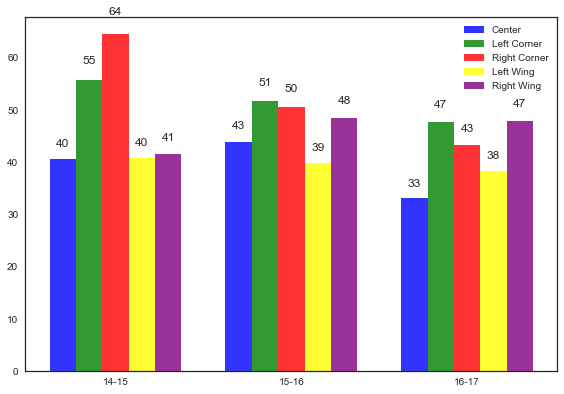

In [46]:
#data to plot
n_groups = 3

shots_center = (get_center_pct('shotchartdetail2014-2015.json'),get_center_pct('shotchartdetail2015-2016.json'),get_center_pct('shotchartdetail2016-2017.json'))
shots_left_corner = (get_leftcorner_pct('shotchartdetail2014-2015.json'),get_leftcorner_pct('shotchartdetail2015-2016.json'),get_leftcorner_pct('shotchartdetail2016-2017.json'))
shots_right_corner = (get_rightcorner_pct('shotchartdetail2014-2015.json'),get_rightcorner_pct('shotchartdetail2015-2016.json'),get_rightcorner_pct('shotchartdetail2016-2017.json'))
shots_left_wing = (get_leftwing_pct('shotchartdetail2014-2015.json'),get_leftwing_pct('shotchartdetail2015-2016.json'),get_leftwing_pct('shotchartdetail2016-2017.json'))
shots_right_wing = (get_rightwing_pct('shotchartdetail2014-2015.json'),get_rightwing_pct('shotchartdetail2015-2016.json'),get_rightwing_pct('shotchartdetail2016-2017.json'))

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, shots_center, bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Center')
 
rects2 = plt.bar(index + bar_width, shots_left_corner, bar_width,
                 alpha=opacity,
                 color='green',
                 label='Left Corner')

rects3 = plt.bar(index + bar_width*2, shots_right_corner, bar_width,
                 alpha=opacity,
                 color='red',
                 label='Right Corner')

rects4 = plt.bar(index + bar_width*3, shots_left_wing, bar_width,
                 alpha=opacity,
                 color='yellow',
                 label='Left Wing')

rects5 = plt.bar(index + bar_width*4, shots_right_wing, bar_width,
                 alpha=opacity,
                 color='purple',
                 label='Right Wing')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
               '%d' % int(height),
               ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.xticks(index + bar_width*2, ('14-15', '15-16', '16-17'))
plt.legend()
plt.tight_layout()
shots_center

In [24]:
threept = df_shots[df_shots['SHOT_TYPE'] == '3PT Field Goal']

In [25]:
#find the total number for 3pts attempted
shots_attempted = threept[threept['SHOT_ATTEMPTED_FLAG']]
totalshots = shots_attempted.count().max()

In [26]:
#drop the missed shots from total 3 pts attempted
made_shots = threept[threept['EVENT_TYPE'] == 'Made Shot']

In [27]:
#find total number of made shots
made_attempted = made_shots[made_shots['SHOT_ATTEMPTED_FLAG']]
totalmade = made_attempted.count().max()

In [28]:
#find the fg percentage of made shots
fgpercentage = totalmade / totalshots

In [29]:
fgpercentage * 100

44.27244582043344

### Make zones for the court

In [30]:
#isolate each zones of the court
leftcolumn = threept[threept['LOC_X'] >= 79]
rightcolumn = threept[threept['LOC_X'] <= -79]
centercolumn = threept[threept['LOC_X'] <= 79]

upper = threept[threept['LOC_Y'] >= 142.5]

leftwing = leftcolumn[leftcolumn['LOC_Y'] >= 142.5]
rightwing = rightcolumn[rightcolumn['LOC_Y'] >= 142.5]
center = centercolumn[centercolumn['LOC_X'] >= -79]
leftcorner = leftcolumn[leftcolumn['LOC_Y'] <= 142.5]
rightcorner = rightcolumn[rightcolumn['LOC_Y'] <= 142.5]

### FG Percentage for CENTER

In [31]:
#CENTER
#find the total 3pt shots attempted at the right wing
centeratt = center[center['SHOT_ATTEMPTED_FLAG']]
centershots = centeratt.count().max()
#drop the miss shots from the total 3 pts attempted
centermade = center[center['EVENT_TYPE'] == 'Made Shot']
#find the total number of made shots from the right wing
centerattempted = centermade[centermade['SHOT_ATTEMPTED_FLAG']]
centermade = centerattempted.count().max()
#find the fg percentage from the right wing
centerpercentage = centermade / centershots
centerpercentage * 100

40.490797546012267

### FG Percentage for RIGHT WING

In [32]:
#RIGHT WING
#find the total 3pt shots attempted at the right wing
rtwingatt = rightwing[rightwing['SHOT_ATTEMPTED_FLAG']]
rtwingshots = rtwingatt.count().max()
#drop the miss shots from the total 3 pts attempted
rtwingmade = rightwing[rightwing['EVENT_TYPE'] == 'Made Shot']
#find the total number of made shots from the right wing
rtwingattempted = rtwingmade[rtwingmade['SHOT_ATTEMPTED_FLAG']]
rtwingmade = rtwingattempted.count().max()
#find the fg percentage from the right wing
rtwingpercentage = rtwingmade / rtwingshots
rtwingpercentage * 100

41.573033707865171

### FG Percentage for LEFT WING

In [33]:
#LEFT WING
#find the total 3pt shots attempted at the right wing
ltwingatt = leftwing[leftwing['SHOT_ATTEMPTED_FLAG']]
ltwingshots = ltwingatt.count().max()
#drop the miss shots from the total 3 pts attempted
ltwingmade = leftwing[leftwing['EVENT_TYPE'] == 'Made Shot']
#find the total number of made shots from the right wing
ltwingattempted = ltwingmade[ltwingmade['SHOT_ATTEMPTED_FLAG']]
ltwingmade = ltwingattempted.count().max()
#find the fg percentage from the right wing
ltwingpercentage = ltwingmade / ltwingshots
ltwingpercentage * 100

40.7035175879397

### FG Percentage for LEFT CORNER

In [34]:
#LEFT corner
#find the total 3pt shots attempted at the right wing
ltcorneratt = leftcorner[leftcorner['SHOT_ATTEMPTED_FLAG']]
ltcornershots = ltcorneratt.count().max()
#drop the miss shots from the total 3 pts attempted
ltcornermade = leftcorner[leftcorner['EVENT_TYPE'] == 'Made Shot']
#find the total number of made shots from the right wing
ltcornerattempted = ltcornermade[ltcornermade['SHOT_ATTEMPTED_FLAG']]
ltcornermade = ltcornerattempted.count().max()
#find the fg percentage from the right wing
ltcornerpercentage = ltcornermade / ltcornershots
ltcornerpercentage * 100

55.737704918032783

### FG Percentage for RIGHT CORNER

In [35]:
#RIGHT corner
#find the total 3pt shots attempted at the right wing
rtcorneratt = rightcorner[rightcorner['SHOT_ATTEMPTED_FLAG']]
rtcornershots = rtcorneratt.count().max()
#drop the miss shots from the total 3 pts attempted
rtcornermade = rightcorner[rightcorner['EVENT_TYPE'] == 'Made Shot']
#find the total number of made shots from the right wing
rtcornerattempted = rtcornermade[rtcornermade['SHOT_ATTEMPTED_FLAG']]
rtcornermade = rtcornerattempted.count().max()
#find the fg percentage from the right wing
rtcornerpercentage = rtcornermade / rtcornershots
rtcornerpercentage * 100

64.583333333333343

### Columns for miss shots

In [36]:
#find the miss shots
miss_shots = threept[threept['EVENT_TYPE'] == 'Missed Shot']

### Plot all miss and made shots from the 3pointer

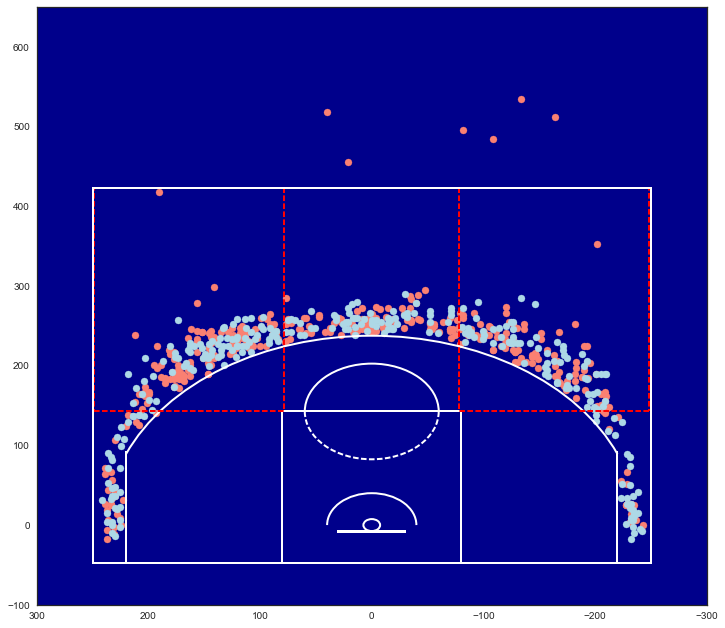

In [37]:
plt.figure(figsize=(12,11))
plt.scatter(miss_shots.LOC_X, miss_shots.LOC_Y, color='Salmon')
plt.scatter(made_shots.LOC_X, made_shots.LOC_Y, color='#add8e6')
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.ylim(-100,650)
plt.show()

### Heat map for made shots

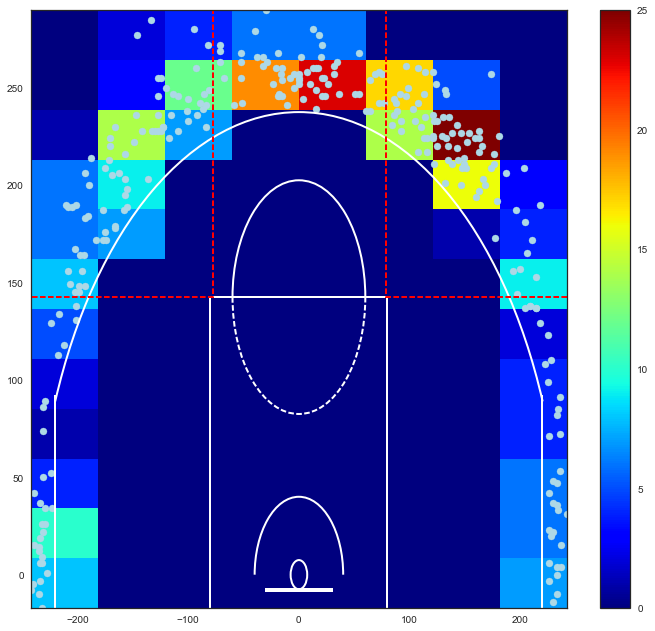

In [38]:
plt.figure(figsize=(12,11))
plt.scatter(made_shots.LOC_X, made_shots.LOC_Y, color='#add8e6')
draw_court(outer_lines=True)

plt.xlim(300,-300)
plt.ylim(-70,500)
#making heatmap
plt.hist2d(made_shots.LOC_X, made_shots.LOC_Y, (8, 12), cmap=plt.cm.jet)
plt.colorbar()

plt.show()

### Heat map for miss shots

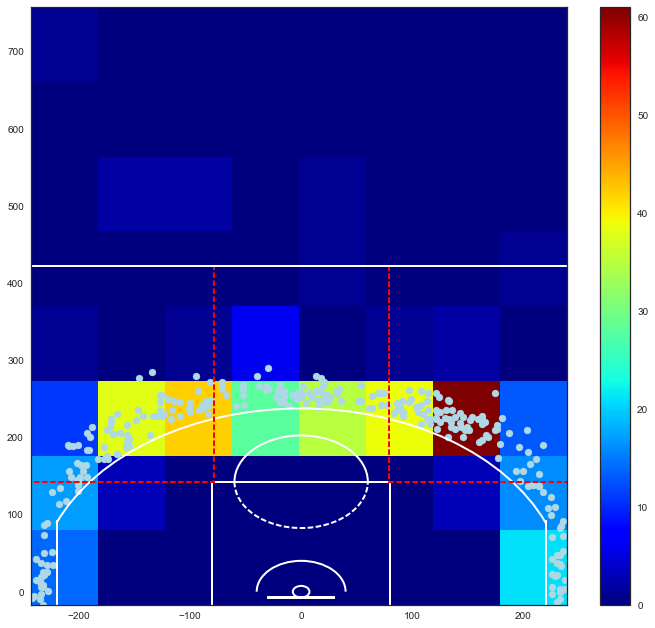

In [39]:
plt.figure(figsize=(12,11))
plt.scatter(made_shots.LOC_X, made_shots.LOC_Y, color='#add8e6')
draw_court(outer_lines=True)

plt.xlim(300,-300)
plt.ylim(-70,500)
#making heatmap
plt.hist2d(miss_shots.LOC_X, miss_shots.LOC_Y, (8, 8), cmap=plt.cm.jet)
plt.colorbar()

plt.show()

### Part 2: Data Analysis: Linear Regression based off of age and fg made